In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

data = data.reset_index()

data.head(2)

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,bct,0,43130,10120,Onion yellow dwarf virus,0.02421,0.01591,0.02233,0.01798,...,0.00336,0.01443,0.00593,0.04397,0.01996,0.04012,0.02223,0.00000,0.00000,0.00030
1,1,bct,0,105154,1455,Chlamydia phage Chp2,0.03505,0.01787,0.02405,0.01856,...,0.00481,0.01993,0.01031,0.04192,0.00962,0.02818,0.03024,0.00137,0.00344,0.00069


In [5]:
x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, [1]])

y

array([['bct'],
       ['bct'],
       ['bct'],
       ...,
       ['vrt'],
       ['vrt'],
       ['vrt']], dtype=object)

## Split Data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)

<ipython-input-8-0d701c6cf623>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=30)

In [9]:
model.score(x_test, y_test)

0.9359410430839002

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

         bct       0.93      0.97      0.95       574
         inv       0.87      0.82      0.84       261
         pln       0.93      0.94      0.94       520
         vrt       0.99      0.95      0.97       409

    accuracy                           0.94      1764
   macro avg       0.93      0.92      0.93      1764
weighted avg       0.94      0.94      0.94      1764

[[559   4  11   0]
 [ 23 213  21   4]
 [ 16  15 489   0]
 [  3  13   3 390]]


array([[559,   4,  11,   0],
       [ 23, 213,  21,   4],
       [ 16,  15, 489,   0],
       [  3,  13,   3, 390]], dtype=int64)

Text(69.0, 0.5, 'Truth')

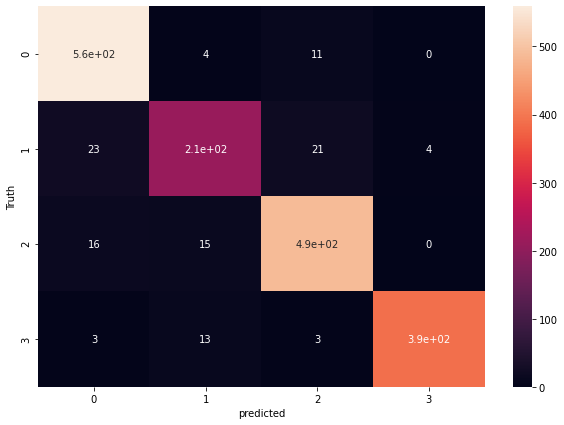

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')